In [40]:
#Importando bibliotecas utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "vscode"
pio.renderers.default = "notebook"

**Atividade - Visualização de Dados**

Definição do escopo da visualização de dados

1. Problema: Falta de monitoramento e transparencia dos custos com parlamentares;

2. Objetivo: Desenvolver um dashboard de monitoramento de custos;

3. Fonte de dados: http://www.camara.leg.br/cotas/Ano-XXXX.csv.zip

4. Frequência: Atualização diária


In [4]:
ano_corrente = 2022 + 1   #Ano inicial da base de dados
inicio = ano_corrente - 4    #Ano final da base de dados

anos = [*range(inicio, ano_corrente, 1)]
consolidated_df = []

for ano in anos:
    df = pd.read_csv("http://www.camara.leg.br/cotas/Ano-"+ str(ano) +".csv.zip", sep=";")
    consolidated_df.append(df)

consolidated_df = pd.concat(consolidated_df)
consolidated_df.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,https://www.camara.leg.br/cota-parlamentar/not...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,https://www.camara.leg.br/cota-parlamentar/not...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,https://www.camara.leg.br/cota-parlamentar/not...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,https://www.camara.leg.br/cota-parlamentar/not...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,https://www.camara.leg.br/cota-parlamentar/not...


**Análise Exploratória de Dados**

In [5]:
consolidated_df["numAno"].unique()

array([2019, 2020, 2021, 2022], dtype=int64)

In [6]:
consolidated_df["txNomeParlamentar"].unique()

array(['LID.GOV-CD', 'LIDERANÇA DO AVANTE', 'LIDERANÇA DO CIDADANIA',
       'LIDERANÇA DO DEMOCRATAS', 'LIDERANÇA DO NOVO',
       'LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL',
       'LIDERANÇA DO PDT', 'LIDERANÇA DO PODEMOS',
       'LIDERANÇA DO PROGRESSISTAS', 'LIDERANÇA DO PSD',
       'LIDERANÇA DO PSDB', 'LIDERANÇA DO PSOL', 'LIDERANÇA DO PT',
       'LIDERANÇA DO PTB', 'LIDERANÇA DO SOLIDARIEDADE', 'LIDMIN',
       'SILVIO COSTA', 'IZALCI LUCAS', 'Danilo Forte', 'MARIA HELENA',
       'Norma Ayub', 'Fausto Pinato', 'Iracema Portella', 'JÚLIA MARINHO',
       'Fábio Henrique', 'Bacelar', 'Felipe Carreras', 'CELSO PANSERA',
       'SIMÃO SESSIM', 'Arlindo Chinaglia', 'ARNALDO FARIA DE SÁ',
       'BETO MANSUR', 'Celso Russomanno', 'ALEX CANZIANI',
       'Gustavo Fruet', 'Osmar Serraglio', 'Rubens Bueno',
       'Henrique Fontana', 'LUIS CARLOS HEINZE', 'Pompeo de Mattos',
       'Ivan Valente', 'JORGE TADEU MUDALEN', 'NELSON MARQUEZELLI',
       'SILVIO TORRES', 'CELSO JA

In [13]:
consolidated_df.shape #Formato do dataframe (linhas, colunas)

(781981, 31)

In [14]:
consolidated_df.info() #Colunas do dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781981 entries, 0 to 113666
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          781981 non-null  object 
 1   cpf                        779315 non-null  float64
 2   ideCadastro                779414 non-null  float64
 3   nuCarteiraParlamentar      779414 non-null  float64
 4   nuLegislatura              781981 non-null  int64  
 5   sgUF                       779414 non-null  object 
 6   sgPartido                  779414 non-null  object 
 7   codLegislatura             781981 non-null  int64  
 8   numSubCota                 781981 non-null  int64  
 9   txtDescricao               781981 non-null  object 
 10  numEspecificacaoSubCota    781981 non-null  int64  
 11  txtDescricaoEspecificacao  192574 non-null  object 
 12  txtFornecedor              781948 non-null  object 
 13  txtCNPJCPF                 70

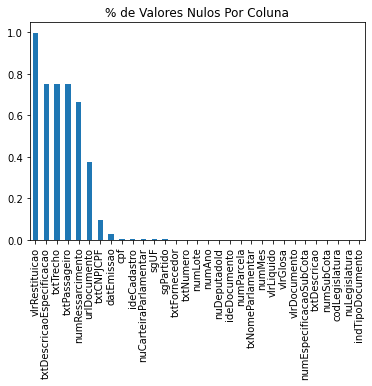

In [7]:
#check for null values

(
    consolidated_df
    .isnull()
    .sum()
    .sort_values(ascending=False)
    / consolidated_df.shape[0]
).plot(kind="bar")
plt.title("% de Valores Nulos Por Coluna")
plt.show()


In [8]:
ano_corrente_df = consolidated_df[consolidated_df["numAno"] == (ano_corrente - 1)]

In [79]:
ano_corrente_df.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2022,0,NaN,NaN,1833951,NaN,NaN,3453,7342370,https://www.camara.leg.br/cota-parlamentar/doc...
1,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÇÕES,...,2022,0,NaN,NaN,1822148,NaN,NaN,2713,7317427,https://www.camara.leg.br/cota-parlamentar/doc...
2,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÇÕES,...,2022,0,NaN,NaN,1825721,NaN,NaN,2713,7324813,https://www.camara.leg.br/cota-parlamentar/doc...
3,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,12,ASSINATURA DE PUBLICAÇÕES,...,2022,0,NaN,NaN,1824104,NaN,NaN,2713,7321395,https://www.camara.leg.br/cota-parlamentar/not...
4,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2022,0,NaN,NaN,1826660,NaN,NaN,2713,7326637,https://www.camara.leg.br/cota-parlamentar/not...


In [19]:
a = (
    ano_corrente_df
    .groupby("sgPartido")["vlrDocumento"]
    .sum()
    .sort_values(ascending=False)
    / ano_corrente_df["vlrDocumento"].sum()
)
a.head()

sgPartido
PL       0.142587
PT       0.115212
PP       0.112446
UNIÃO    0.105033
PSD      0.092434
Name: vlrDocumento, dtype: float64

In [17]:
b = (
    ano_corrente_df
    .groupby("sgPartido")["vlrDocumento"]
    .sum()
    /
    ano_corrente_df
    .groupby("sgPartido")["cpf"]
    .nunique()
    
).sort_values(ascending=False)
b.head()

sgPartido
REDE        287774.120000
PATRIOTA    237229.418000
PDT         230440.795789
PT          226466.280536
PTB         222299.516667
dtype: float64

In [21]:
c = (
    ano_corrente_df
    .groupby("txtDescricao")["vlrDocumento"]
    .sum()
    .sort_values(ascending=False)

)

In [12]:
d = (
    ano_corrente_df
    .groupby("numMes")["vlrDocumento"]
    .sum()
)
d.mean()

13759557.23625

In [78]:
e = (
    ano_corrente_df
    .groupby(["txNomeParlamentar", "sgPartido"])["vlrDocumento"]
    .sum()
    .sort_values(ascending=False)
)
e.head()

txNomeParlamentar  sgPartido
Bibo Nunes         PL           326770.35
Danilo Forte       UNIÃO        316816.46
Silvia Cristina    PL           306464.14
Joenia Wapichana   REDE         305462.08
Covatti Filho      PP           294087.08
Name: vlrDocumento, dtype: float64

In [77]:
f = (
    ano_corrente_df
    .groupby(["txNomeParlamentar", "sgPartido"])["vlrDocumento"]
    .sum()
    .sort_values(ascending=True)
)
f.head(20)

txNomeParlamentar      sgPartido   
Flordelis              PSD              -771.00
Marcio Alvino          PL                 80.56
Joceval Rodrigues      CIDADANIA         200.00
Alexandre Figueiredo   PSD              2397.25
Antônia Lúcia          REPUBLICANOS     2621.23
Lucas Follador         PSC              2663.61
Aníbal Gomes           UNIÃO            2700.08
Tiago Andrino          PSB              7164.43
Lázaro Botelho         PP               7386.51
Adriana Ventura        NOVO            15634.55
Tiago Mitraud          NOVO            19412.01
Pedro Cunha Lima       PSDB            22662.53
Marco Brasil           PP              30755.48
Paulo Eduardo Martins  PL              33220.82
Paulo Ganime           NOVO            35166.42
Flávia Arruda          PL              35483.76
Sargento Alexandre     PODE            36196.54
Gilson Marques         NOVO            38609.56
Márcio Macêdo          PT              40059.86
Laerte Bessa           PL              41329.65
Name

**Dashboard**

1. Participação no Custo Total por Partido (Barra)

2. Custo Médio do Partido por Parlamentar (Barra Horizontal)

3. Top 5, Ultimos 5 - Gastos (Barra Empilhada por Tipo de despesas)

4. Gasto Anual (Linha)

5. Quantidade Parlamentar por Partido ()

Text(0.5, 1.0, 'Gastos Mensais - 2022')

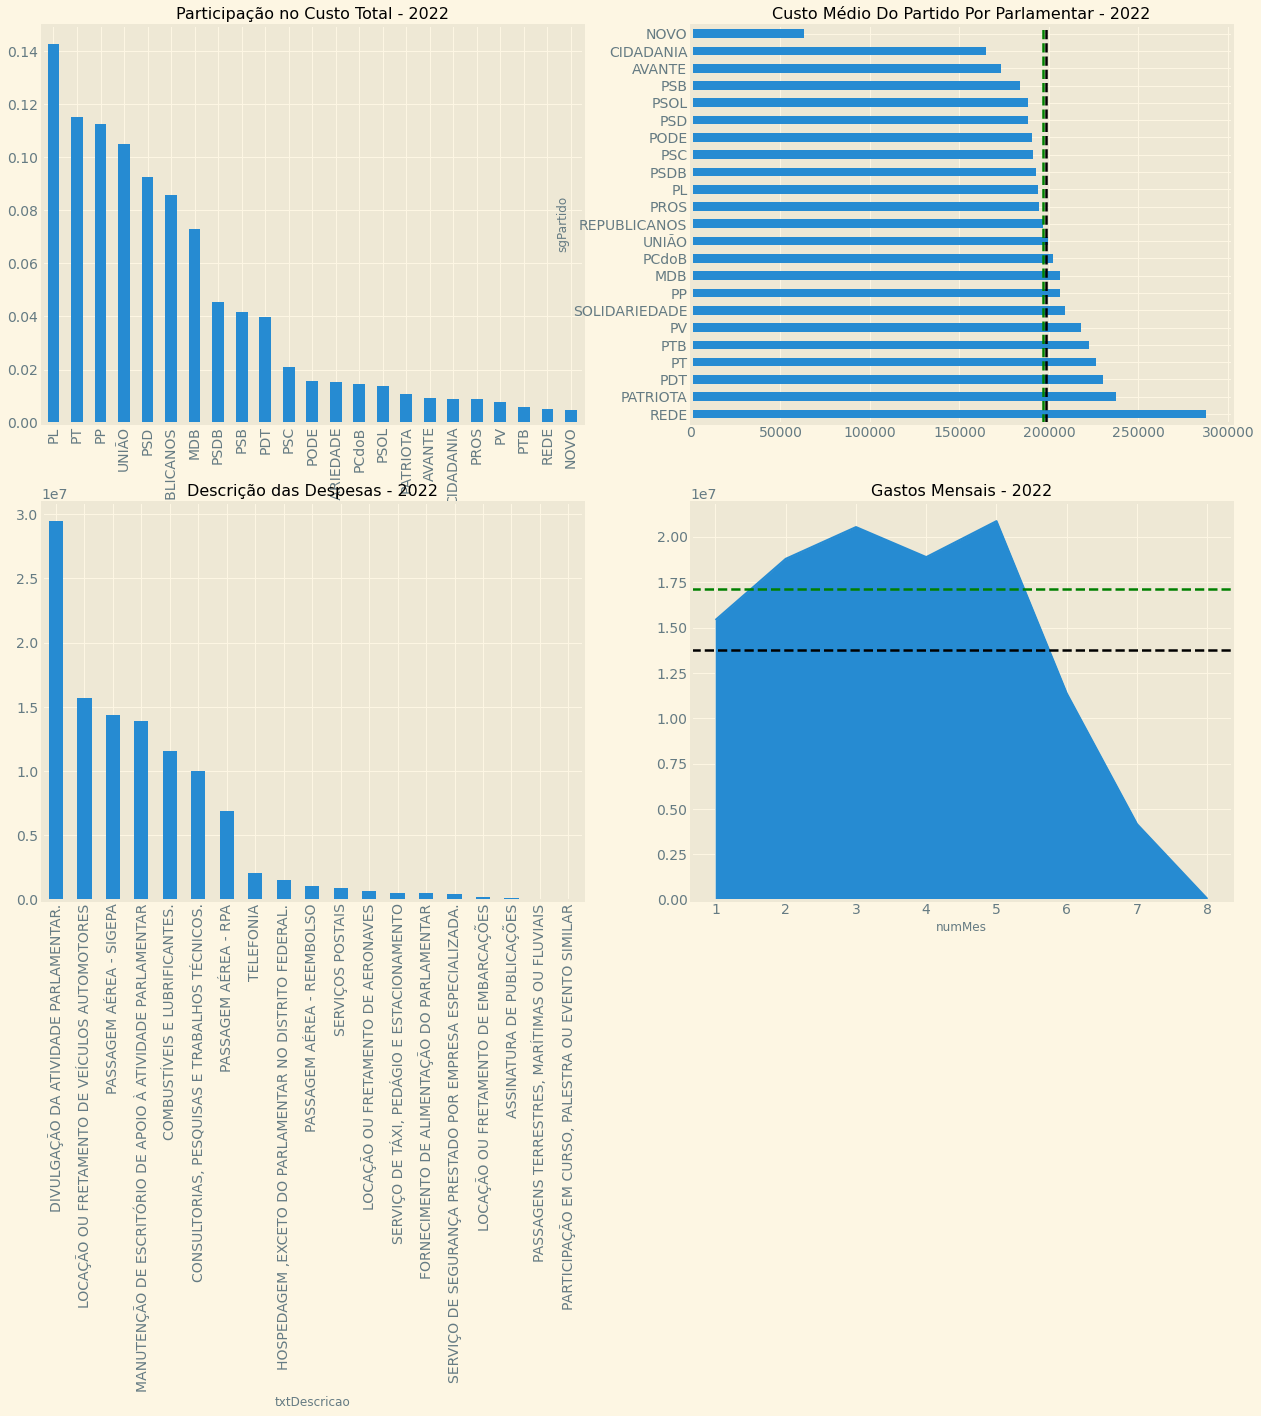

In [71]:


plt.figure(figsize=(19, 15))
plt.style.use('Solarize_Light2')

plt.subplot(2, 2, 1)
a.plot(kind="bar")
plt.title("Participação no Custo Total - " + str(ano_corrente - 1))


plt.subplot(2, 2, 2)
b.plot(kind="barh")
plt.axvline(b.mean(), c="black", ls='--', lw=2.5)
plt.axvline(b.median(), c="green", ls='--', lw=2.5)
plt.title("Custo Médio Do Partido Por Parlamentar - " + str(ano_corrente - 1))

plt.subplot(2, 2, 3)
c.plot(kind="bar")
plt.title("Descrição das Despesas - " + str(ano_corrente - 1))


plt.subplot(2, 2, 4)
d.plot(kind="area")
plt.axhline(d.mean(), c="black", ls='--', lw=2.5)
plt.axhline(d.median(), c="green", ls='--', lw=2.5)
plt.title("Gastos Mensais - " + str(ano_corrente - 1))

**Gráficos Individuais**

In [63]:
fig1 = px.bar(a)
fig1.update_yaxes(title='% dos Gastos', visible=True, showticklabels=True)
fig1.update_xaxes(title=None, visible=True, showticklabels=True)
fig1.update_layout(showlegend=False)
fig1.show()

In [68]:
fig2 = px.bar(b, orientation='h')
fig2.update_yaxes(title=None, visible=True, showticklabels=True)
fig2.update_xaxes(title=None, visible=True, showticklabels=True)
fig2.update_layout(showlegend=False)
fig2.show()

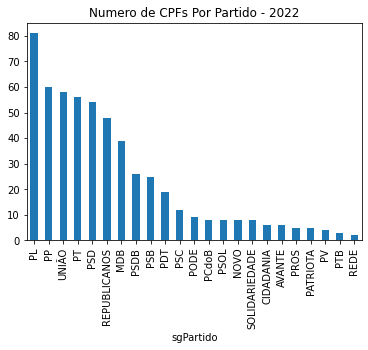

In [30]:
(
    ano_corrente_df[ano_corrente_df["cpf"].notnull()]
    .groupby("sgPartido")["cpf"]
    .nunique()
    .sort_values(ascending=False)

).plot(kind="bar")

plt.title("Numero de CPFs Por Partido - " + str(ano_corrente - 1))

plt.show()

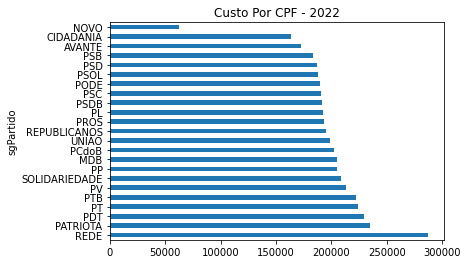

In [32]:
(
    ano_corrente_df
    .groupby("sgPartido")["vlrDocumento"]
    .sum()
    /
    ano_corrente_df
    .groupby("sgPartido")["cpf"]
    .nunique()
    
).sort_values(ascending=False).plot(kind="barh")

plt.title("Custo Por CPF - " + str(ano_corrente - 1))

plt.show()

ValueError: Single argument to subplot must be a three-digit integer, not <AxesSubplot:xlabel='sgPartido'>

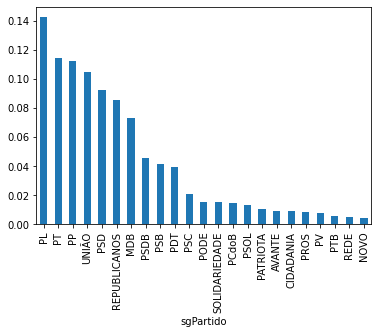